In [78]:
import pandas as pd
import numpy as np

In [80]:
players = pd.read_csv(r"C:\Users\dinht\OneDrive\Desktop\học data\Học Python\k-cluster\players_22.csv")

C:\Users\dinht\AppData\Local\Temp\ipykernel_22624\1952165311.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv(r"C:\Users\dinht\OneDrive\Desktop\học data\Học Python\k-cluster\players_22.csv")


In [82]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [84]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [86]:
players = players.dropna(subset=features)

In [88]:
data = players[features].copy()


In [90]:
data


,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


# Choose the right number of cluster by:
### The Within Cluster Sum of Squares (WCSS)
### The Average Silhouette Score
### The Calinski Harabasz Score

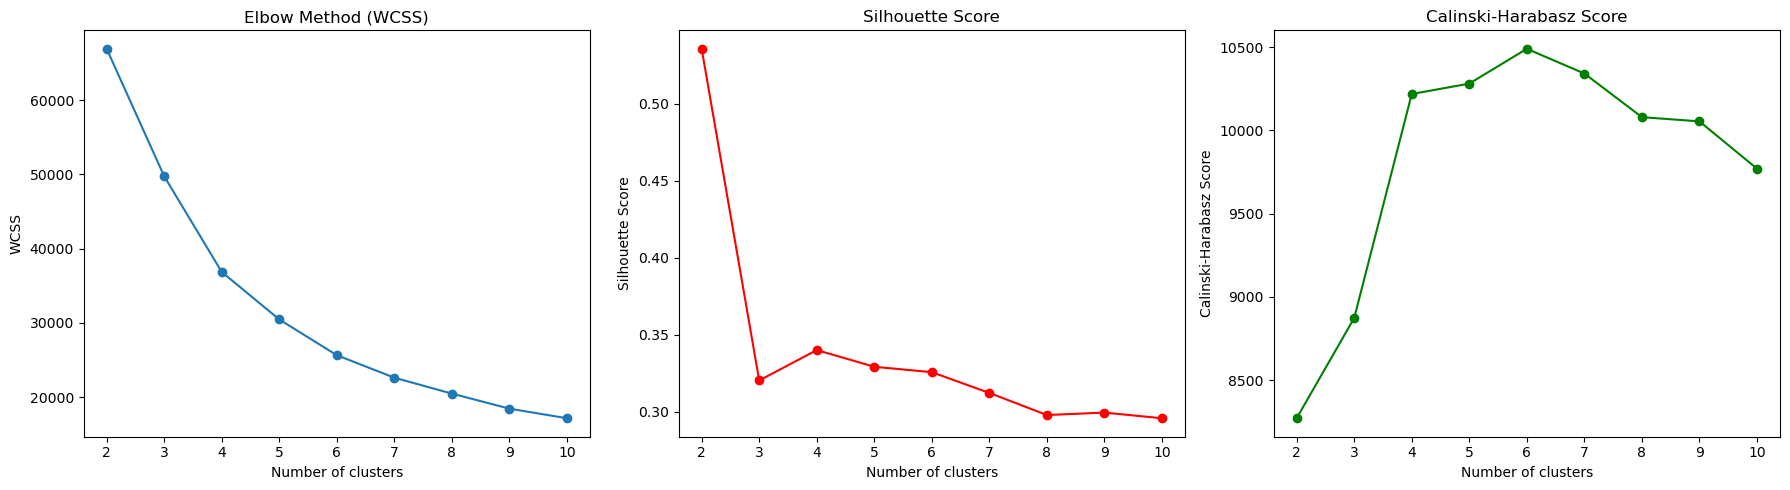

In [92]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
players_scaled = scaler.fit_transform(data)

# Range of potential clusters
range_clusters = range(2, 11)

wcss = []
silhouette_scores = []
calinski_harabasz_scores = []

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(players_scaled)
    
    # WCSS
    wcss.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(players_scaled, cluster_labels))
    
    # Calinski-Harabasz Score
    calinski_harabasz_scores.append(calinski_harabasz_score(players_scaled, cluster_labels))

# Plotting the metrics
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(range_clusters, wcss, marker='o')
plt.title('Elbow Method (WCSS)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1, 3, 2)
plt.plot(range_clusters, silhouette_scores, marker='o', color='r')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 3)
plt.plot(range_clusters, calinski_harabasz_scores, marker='o', color='g')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()


### From WCSS: We can choose n=4 and n=5 relate 4 and 5 clusters
### From Sihouette Score: We can choose n=3 relate 3 clusters
### from Calinski: We can choose n=3 and n=4 relate 3 and 4 clusters

# Now, we are moving on to deploying a k-means clustering algorithm, step by step.

1. Scale data to standardize values
2. Initialize random centroids
3. Get labels for each data point
4. Create new centroids
5. Plot the centroids
6. Repeat 3-5 until the centroids stop changing

## 1. Why we need to scale data for k-means clustering?
#### scaling data is crucial for k-means clustering to ensure that all features contribute equally to the clustering process and to improve the algorithm's performance.

In [110]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [112]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


## 2. Initialize random centroids
#### initializing random centroids is essential for the k-means algorithm to effectively partition the data into clusters, explore different clustering solutions, and ultimately find a meaningful representation of the data structure.

In [115]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [117]:
centroids = random_centroids(data, 3)

C:\Users\dinht\AppData\Local\Temp\ipykernel_22624\1845334667.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [119]:
centroids

,0,1,2
overall,5.304348,6.086957,5.891304
potential,5.500000,4.913043,4.717391
wage_eur,1.064378,1.000000,2.120172
value_eur,1.950658,1.018140,1.007469
age,5.000000,5.666667,2.000000


## 3. Get labels for each data point
#### obtaining labels for each data point is essential for understanding, evaluating, and visualizing the results of the k-means clustering process, as well as for enabling further analysis and refinement of the clustering solution.

In [121]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [123]:
labels = get_labels(data, centroids)

In [125]:
labels.value_counts()

0    7849
2    6256
1    5060
Name: count, dtype: int64

## 4. Create new centroids

In [127]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

## 5.Plot the centroids

In [129]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [131]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

## 6. Repeat 3-5 until the centroids stop changing

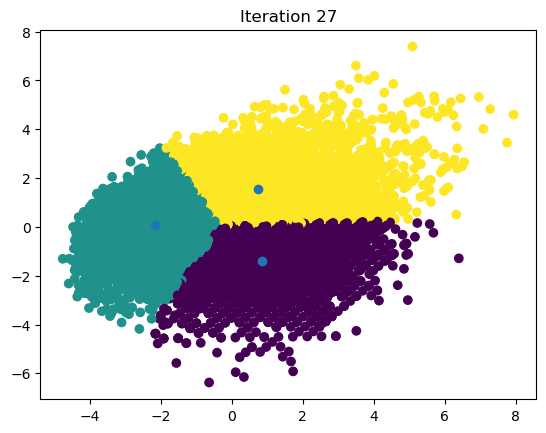

In [133]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [135]:
centroids


,0,1,2
overall,4.784633,3.206838,5.806043
potential,4.506962,4.928473,6.497993
wage_eur,1.118904,1.028505,1.420001
value_eur,1.044980,1.026614,1.285501
age,5.472247,2.518708,3.596161


In [137]:
labels.value_counts()


0    7173
1    6223
2    5769
Name: count, dtype: int64

## Import to file CSV if we need

In [139]:
players[labels == 0][["short_name"] + features]


,short_name,overall,potential,wage_eur,value_eur,age
199,Pepe,82,82,14000.0,5500000.0,38
284,Joaquín,81,81,23000.0,8500000.0,39
292,José Fonte,81,81,30000.0,4600000.0,37
388,G. Buffon,80,80,18000.0,2300000.0,43
509,Iniesta,79,79,10000.0,5500000.0,37
...,...,...,...,...,...,...
18890,S. Haokip,51,51,500.0,60000.0,28
18971,Lalkhawpuimawia,51,51,500.0,60000.0,29
19032,Song Yue,50,50,2000.0,40000.0,29
19100,J. Russell,49,49,500.0,15000.0,36


In [141]:
from sklearn.cluster import KMeans


In [143]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [74]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T


,0,1,2,3,4
overall,4.762217,4.307136,7.055790,2.922350,5.852163
potential,6.058264,4.086476,7.358696,4.712334,5.523227
wage_eur,1.122860,1.053858,2.276308,1.020227,1.323142
value_eur,1.084745,1.027426,1.920533,1.017642,1.110389
age,3.008117,5.252101,4.147476,2.515600,5.816067
